# Queimadas nas florestas brasileiras - 2012 a 2016

## Projeto Final - Técnicas de Programação I

### Integrantes

- Glaydson Gonçalo dos Santos Almeida
- Guilherme Araújo Mendes de Souza
- Laura Busin Campos
- Miller Machado Monteiro

### Bases utilizadas
- **Queimadas:** https://dados.gov.br/dados/conjuntos-dados/snif
- **Informações do clima:** https://www.kaggle.com/datasets/fabiojorge/brazil-temperature-2012-2019 (separada em duas partes)

<sub>**Observação**: Devido aos seus tamanhos, as bases com informações do clima foram convertidas do formato .csv para o .parquet para que conseguíssemos subí-las no github</sub>

### Introdução
O Brasil é um país vasto e diversificado, com uma extensa variedade de climas e ecossistemas. O entendimento dos padrões climáticos e das condições ambientais é fundamental para compreender a dinâmica dos incêndios florestais, que representam uma séria ameaça à biodiversidade e ao equilíbrio ecológico. Neste contexto, este trabalho analisa dados climáticos e de ocorrências de incêndios em 23 estados brasileiros durante o período de 2012 a 2016. <br><br>
O conjunto de dados utilizado abrange informações de temperatura, umidade relativa, precipitação e quantidade de incêndios por mês, fornecendo uma visão abrangente das condições ambientais e sua relação com os incêndios florestais. A análise desses dados busca identificar padrões e tendências. Será que a quantidade de incêndios varia entre os estados e entre os anos? Qual será a característica climática que mais influencia na qunatidade de incêndios?

### Tratamento dos dados

#### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Sigla dos estados

In [2]:
sigla_dos_estados = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapa': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceara': 'CE', 'Distrito Federal': 'DF', 'Espirito Santo': 'ES',
    'Goias': 'GO', 'Maranhao': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG', 'Para': 'PA', 'Paraiba': 'PB', 'Parana': 'PR',
    'Pernambuco': 'PE', 'Piaui': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondonia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'Sao Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

#### Meses do ano

In [3]:
meses_ano = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6,
    'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

#### Leitura dos dados

In [4]:
#Lendos os dados via arquivo csv e parquet
df_amazon = pd.read_csv('../Data/amazon.csv', encoding='ISO-8859-1', thousands = '.', sep = ';')
df_data_p1 = pd.read_parquet('../Data/output_data_part1.parquet')
df_data_p2 = pd.read_parquet('../Data/output_data_part2.parquet')

#### Pré-visualização dos dados

In [5]:
df_amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002


In [6]:
#Nota-se um erro de formatação mês escrito da data
df_amazon.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,01/01/2012
6450,2013,Tocantins,Dezembro,85,01/01/2013
6451,2014,Tocantins,Dezembro,223,01/01/2014
6452,2015,Tocantins,Dezembro,373,01/01/2015
6453,2016,Tocantins,Dezembro,119,01/01/2016


In [7]:
df_data_p1.head()

,CodigoOMM,NomeEstacao,Estado,EstadoDesc,EstadoRegiao,Latitude,Longitude,Altitude,EstacaoStituacao,OperanteDesde,...,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVentoInsolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,91.0,943.6,1010.2,14.0,7.0,11.3,0.0,7.8,25.92,89.0
1,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,88.0,945.7,1012.3,5.0,5.0,NaN,1.0,NaN,NaN,NaN
2,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,89.0,943.7,1010.1,14.0,5.0,10.5,0.0,8.4,27.26,87.0
3,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,82.0,944.5,1010.8,5.0,7.0,NaN,3.0,NaN,NaN,NaN
4,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,90.0,942.7,1008.7,14.0,5.0,8.9,0.0,10.5,26.68,87.0


In [8]:
df_data_p2.head()

,CodigoOMM,NomeEstacao,Estado,EstadoDesc,EstadoRegiao,Latitude,Longitude,Altitude,EstacaoStituacao,OperanteDesde,...,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVentoInsolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,53.0,981.5,1008.9,9.0,4.8,11.3,0.0,13.0,30.24,51.25
1,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,56.0,985.3,1012.9,9.0,4.5,NaN,7.0,NaN,NaN,NaN
2,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,33.0,980.2,1007.6,14.0,3.3,NaN,6.0,NaN,NaN,NaN
3,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,58.0,982.3,1008.3,5.0,4.8,10.5,9.0,9.1,29.34,56.75
4,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,60.0,985.0,1012.6,5.0,3.0,NaN,7.0,NaN,NaN,NaN


#### Tratamento do campo date do df_amazon que mostra sempre ano-01-01 independentemente do mês

In [9]:
df_amazon = df_amazon.rename(columns={'month': 'mes', 'year': 'ano'})
df_amazon['date'] = pd.to_datetime(df_amazon['date'])

In [10]:
df_amazon['day'] = df_amazon['date'].dt.day
df_amazon['month'] = df_amazon['date'].dt.month
df_amazon['year'] = df_amazon['date'].dt.year

In [11]:
df_amazon['month'] = [meses_ano[mes] for mes in df_amazon['mes']]

In [12]:
df_amazon['date'] = pd.to_datetime(df_amazon[['year', 'month', 'day']])

In [13]:
df_amazon = df_amazon.drop(['day', 'month', 'year'], axis=1)
df_amazon = df_amazon.rename(columns={'mes': 'month', 'ano': 'year'})

#### Padronização das datas

[..]

In [14]:
df_data_p1['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y', errors='coerce')
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y', errors='coerce')

In [15]:
df_amazon['date'] = pd.to_datetime(df_amazon['date'])
df_amazon['date'] = pd.to_datetime(df_amazon['date'], format='%d/%m/%Y')

In [16]:
df_data_p1['Data'] = pd.to_datetime(df_data_p1['Data'])
df_data_p1['Data'] = pd.to_datetime(df_data_p1['Data'], format='%d/%m/%Y')

In [17]:
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'])
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y')

#### Filtragem dos DF´s

[...]

In [18]:
df_amazon = df_amazon[(df_amazon['date'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_amazon['date'] >= pd.Timestamp(year=2012, month=1, day=1))]

df_data_p1 = df_data_p1[(df_data_p1['Data'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_data_p1['Data'] >= pd.Timestamp(year=2012, month=1, day=1))]

df_data_p2 = df_data_p2[(df_data_p2['Data'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_data_p2['Data'] >= pd.Timestamp(year=2012, month=1, day=1))]

#### Concatenação dos dataframe df_data_p1 e df_data_p2

In [19]:
df_data = pd.concat([df_data_p1, df_data_p2], ignore_index=True)

In [20]:
filtro = df_data[['Estado', 'EstadoDesc', 'Data', 'Precipitacao', 'TempMaxima', 'TempMinima', 'UmidadeRelativa']]

In [21]:
media_mensal = filtro.groupby(['Estado', 'EstadoDesc', pd.Grouper(key='Data', freq='M')]).mean()

media_mensal = media_mensal.reset_index()

#### Concatenação dos dataframe media_mensal e df_amazon

In [22]:
df_amazon.rename(columns={'state': 'EstadoDesc', 'date': 'Data', 'year': 'Ano'}, inplace=True)

In [23]:
df_amazon['Data'] = pd.to_datetime(df_amazon['Data'])
media_mensal['Data'] = pd.to_datetime(media_mensal['Data'])

In [24]:
df_amazon['AnoMes'] = df_amazon['Data'].dt.to_period('M')

media_mensal['AnoMes'] = media_mensal['Data'].dt.to_period('M')

In [25]:
df_amazon['Estado'] = [sigla_dos_estados[estado] for estado in df_amazon['EstadoDesc']]

In [26]:
df = pd.merge(df_amazon, media_mensal, on=['Estado', 'AnoMes'], how = 'inner')

In [27]:
#Visão detalha dos tipos (Dtype) das colunas concatenadas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano              1474 non-null   int64         
 1   EstadoDesc_x     1474 non-null   object        
 2   month            1474 non-null   object        
 3   number           1474 non-null   int64         
 4   Data_x           1474 non-null   datetime64[ns]
 5   AnoMes           1474 non-null   period[M]     
 6   Estado           1474 non-null   object        
 7   EstadoDesc_y     1474 non-null   object        
 8   Data_y           1474 non-null   datetime64[ns]
 9   Precipitacao     1474 non-null   float64       
 10  TempMaxima       1459 non-null   float64       
 11  TempMinima       1453 non-null   float64       
 12  UmidadeRelativa  1474 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(4), period[M](1)
memory usage: 161.2+ KB


#### Organizando os nomes e as colunas do df

In [28]:
df.drop(['Data_x', 'Data_y', 'EstadoDesc_y'], axis=1, inplace=True)

In [29]:
df.rename(columns={'EstadoDesc_x': 'EstadoDesc', 'number': 'QtQueimadas', 'month': 'Mes'}, inplace=True)

In [30]:
df = df[['AnoMes', 'Ano', 'Mes', 'EstadoDesc', 'Estado', 'QtQueimadas', 'Precipitacao', 'TempMaxima', 'TempMinima', 'UmidadeRelativa']]

#### Tratamento dos nulos

Após fazer a contagem de nulos reparamos que as variáveis TempMaxima e TempMinima tinham alguns valores nulos. Investigando melhor descobrimos que eram registros dos estados do Mato Grosso do Sul e do Paraná, isso porque os dados desses estados estavam faltando para alguns dos AnoMeses na base com informações sobre o clima.
Como o dataset é muito grande e não vamos trabalhar com todos os estados disponíveis, escolhemos excluir esses dois estados da nossa base e trabalhar apenas com os estados restantes.

In [31]:
# Analisando quais colunas possuem registros nulos
df.isnull().sum()

AnoMes              0
Ano                 0
Mes                 0
EstadoDesc          0
Estado              0
QtQueimadas         0
Precipitacao        0
TempMaxima         15
TempMinima         21
UmidadeRelativa     0
dtype: int64

In [32]:
# Obseravando as ocorrências onde as variáveis de temperatura máxima e mínima são nulas
mascara = (df['TempMinima'].isnull()) | (df['TempMaxima'].isnull())

missing = df[mascara]

missing

,AnoMes,Ano,Mes,EstadoDesc,Estado,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
603,2015-01,2015,Janeiro,Mato Grosso do Sul,MS,226,5.933871,35.950000,NaN,71.367568
604,2016-01,2016,Janeiro,Mato Grosso do Sul,MS,127,6.580645,NaN,NaN,76.612903
608,2015-02,2015,Fevereiro,Mato Grosso do Sul,MS,148,4.894643,35.692857,NaN,77.297619
609,2016-02,2016,Fevereiro,Mato Grosso do Sul,MS,187,15.200000,NaN,NaN,96.000000
612,2014-03,2014,Março,Mato Grosso do Sul,MS,95,6.256452,35.038710,NaN,73.306452
613,2015-03,2015,Março,Mato Grosso do Sul,MS,190,5.951613,33.493548,NaN,78.215054
616,2014-04,2014,Abril,Mato Grosso do Sul,MS,129,4.640000,35.188462,NaN,74.255682
620,2014-05,2014,Maio,Mato Grosso do Sul,MS,70,3.748485,34.659375,NaN,79.741758
621,2015-05,2015,Maio,Mato Grosso do Sul,MS,58,8.056452,32.856250,NaN,82.994595
624,2014-06,2014,Junho,Mato Grosso do Sul,MS,84,4.366176,31.713889,NaN,80.034884


In [33]:
# Fazendo uma lista com os estados que possuem valores nulos de tewmperatura

estados_nan = list(missing['Estado'].unique())
estados_nan

['MS', 'PR']

In [34]:
# Filtrando apenas os estados que não possuem valores nulos e temperatura

df = df.loc[~df['Estado'].isin(estados_nan)]

In [35]:
# Verificando se ainda existe algum cmapo com valores nulos

df.isnull().sum()

AnoMes             0
Ano                0
Mes                0
EstadoDesc         0
Estado             0
QtQueimadas        0
Precipitacao       0
TempMaxima         0
TempMinima         0
UmidadeRelativa    0
dtype: int64

### Análises estatísticas

#### Estatística Descritiva

No primeiro momento foi realizada uma análise descritiva dos dados para ver como eles estavam distribuídos num geral. Como nosso dataset está subdividido em algumas categorias como tempo e localização, resolvemos também fazer análises descritivas mais focadas em cada uma delas. <br>
- Na análise descritiva total é possível observar que temos outliers em todas as variáveis, principalmente na variável quantidade de queimadas. Essa grande quantidade de outliers se deve pelas distintas características entre os estados do Brasil.
- Com a distância entre a média e a mediana é possível reparar que os dados de precipitação, temperatura possuem uma simetria pequena, a umidade possui uma distribuição quase simétrica, enquanto a quantidade de queimadas possui uma distribuição bem assimétrica para a direita.
- Observando a diferença interquartil (25% a 75%) e o boxplot temos que os dados de quantidade de queimadas é bem disperso (IQR = 329) e os outros dados possuem uma baixa dispersão.

In [36]:
desc_stats = df.describe()

desc_stats = desc_stats.loc[:, desc_stats.columns != 'Ano']
desc_stats

,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,589.486232,3.778830,30.946977,20.270155,71.471661
std,1411.360553,2.635092,3.300272,3.239892,9.083527
min,0.000000,0.000000,18.554637,8.593250,42.322581
25%,19.000000,1.749781,29.349728,18.431210,66.036456
50%,75.000000,3.163326,31.695385,21.118054,71.927778
75%,348.000000,5.451222,33.195998,22.843315,77.891804
max,11068.000000,15.304839,37.592126,25.540678,90.577206


In [37]:
# Criando função para gerar gráficos de boxplot

def gera_boxplot(df, coluna, outliers = True):
    df.boxplot(coluna, showfliers = outliers, flierprops=dict(markersize=3))
    mean = df[coluna].mean()
    plt.plot(1, mean, 'ro', markersize = 3)
    plt.tick_params(axis='x', labelsize=10)
    plt.grid()

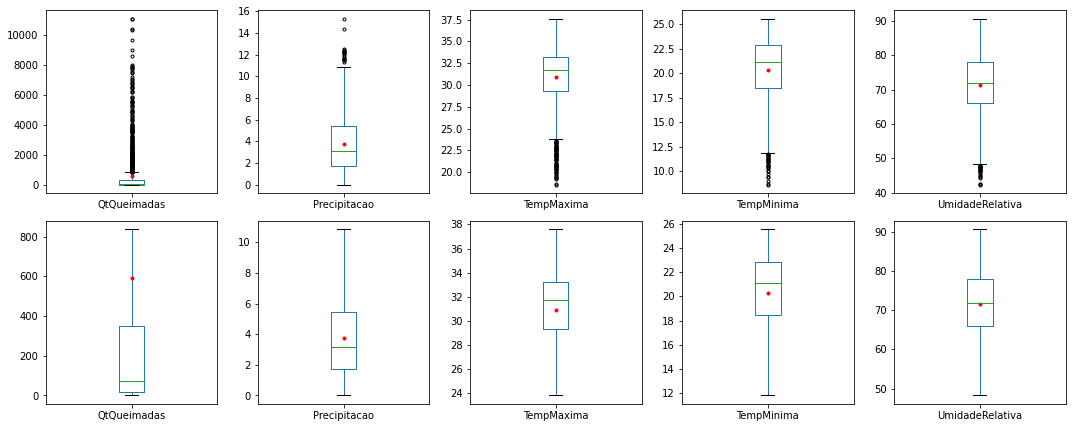

In [38]:
# Gerando o grid de gráficos

plt.subplots(2, 5, figsize=(15, 6))
plt.gcf().set_facecolor('white')

# Quantidade de queimadas
plt.subplot(2, 5, 1)
gera_boxplot(df, 'QtQueimadas')
plt.subplot(2, 5, 6)
gera_boxplot(df, 'QtQueimadas', False)

# Precipitação
plt.subplot(2, 5, 2)
gera_boxplot(df, 'Precipitacao')
plt.subplot(2, 5, 7)
gera_boxplot(df, 'Precipitacao', False)

# Temperatura máxima
plt.subplot(2, 5, 3)
gera_boxplot(df, 'TempMaxima')
plt.subplot(2, 5, 8)
gera_boxplot(df, 'TempMaxima', False)

# Temperatura mínima
plt.subplot(2, 5, 4)
gera_boxplot(df, 'TempMinima')
plt.subplot(2, 5, 9)
gera_boxplot(df, 'TempMinima', False)

# Umidade Relativa
plt.subplot(2, 5, 5)
gera_boxplot(df, 'UmidadeRelativa')
plt.subplot(2, 5, 10)
gera_boxplot(df, 'UmidadeRelativa', False)

plt.tight_layout()
plt.show()

##### Por estado

Como o Brasil é muito grande e possui características bem distintas entre seus estados, também é importante fazer essa análise por estado. Assim podemos entender se a grande quantidade de outliers são pontos extremos mesmo ou se são apenas devido a regionalidade do país.

In [39]:
# Criando função para gerar gráficos de boxplot agrupado

def gera_boxplot_agrupado(df, coluna, agrupamento, tamanho, outliers = True):
    fig, ax = plt.subplots(figsize = tamanho)
    plt.gcf().set_facecolor('white')
    df.boxplot(column = coluna, by = agrupamento, showfliers = outliers, ax = ax, flierprops=dict(markersize=3))
    ax.get_figure().suptitle('')
    ax.set_title(coluna, fontsize=10)
    plt.xlabel('')
    
    means = df.groupby(agrupamento)[coluna].mean()
    for i, agrup in enumerate(np.sort(df[agrupamento].unique())):
        plt.plot(i + 1, means[agrup], 'ro', markersize = 3)
    
    plt.show()

In [40]:
# Trazendo apenas as informações de distribuição dos dados de quantidade de queimada
desc_stats_queimada = df[['Estado', 'QtQueimadas']].groupby('Estado').describe()

# Trazendo o top 10 dos estados com as maiores médias
desc_stats_queimada['QtQueimadas'].sort_values(by = 'mean', ascending = False)[: 10]

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
PA,60.0,2583.266667,3184.037283,11.0,78.25,581.5,5011.00,11068.0
MT,60.0,2239.900000,2636.478196,166.0,536.00,1072.5,2378.50,11068.0
MA,60.0,2002.166667,2353.865347,5.0,117.50,901.0,3587.50,10395.0
TO,60.0,1201.816667,1576.428601,4.0,111.50,459.0,1722.50,7461.0
BA,60.0,959.366667,1622.714079,107.0,197.50,316.0,750.25,7956.0
PI,60.0,897.633333,1241.964204,14.0,71.75,353.5,1200.00,5828.0
AM,60.0,822.400000,1308.405981,3.0,34.50,171.0,1074.75,5882.0
MG,60.0,751.383333,1115.845793,61.0,131.25,203.5,920.25,4735.0
GO,60.0,462.050000,608.834325,21.0,84.50,180.0,551.25,2452.0


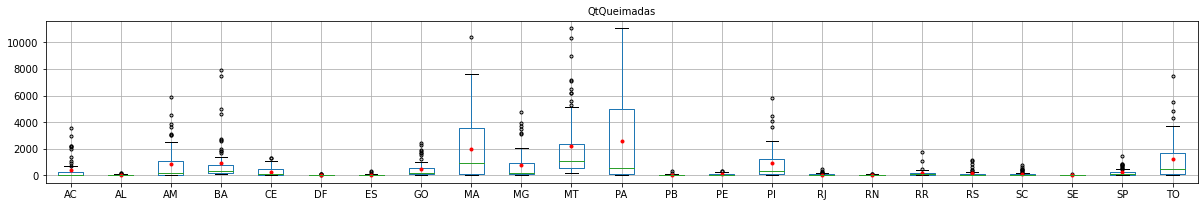

In [41]:
gera_boxplot_agrupado(df, 'QtQueimadas', 'Estado', (20, 3), outliers = True)

Com o resultado do describe e do boxplot para a quantidade de queimadas, é possível reparar:
- Apesar de ainda ter bastante outliers, a quantidade reduziu drasticamente em comparação com a visão do dataset como um todo. Além disso, esses outliers ainda podem estar relacionados com a diferença entre um ano e outro da amostragem.
- A assimetria para a direita ainda continua presente. Ou seja, existem valores muito altos puxando a média pra cima, apesar da grande maioria dos valores serem mais baixos.
- A diferença interquartil aumenta conforme o estado tem uma maior quantidade de queimadas

In [42]:
# Trazendo apenas as informações de distribuição dos dados de precipitação
desc_stats_chuva = df[['Estado', 'Precipitacao']].groupby('Estado').describe()

# Trazendo o top 10 dos estados com as maiores médias
desc_stats_chuva['Precipitacao'].sort_values(by = 'mean', ascending = False)[: 10]

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
AM,60.0,7.705600,1.927258,4.440517,6.526132,7.621488,8.794331,12.448171
PA,60.0,6.404592,2.132227,2.108046,4.999298,6.432737,7.786320,11.485106
AC,60.0,6.337256,3.402123,0.659677,3.138978,6.351054,8.848843,14.368605
SC,60.0,5.537647,2.018390,1.520430,4.416915,5.375941,6.889785,10.160215
RR,60.0,5.082683,3.172155,0.294231,2.033083,5.186369,7.950510,11.923913
MT,60.0,4.777880,2.460548,0.239516,3.178739,4.374971,5.875276,12.182927
RS,60.0,4.694594,1.395847,1.854657,3.656488,4.471900,5.759580,8.526667
TO,60.0,4.263644,2.930441,0.266423,1.617906,3.626717,6.346445,12.235862
DF,60.0,3.960807,3.093607,0.000000,1.092689,3.977201,6.389975,12.274510


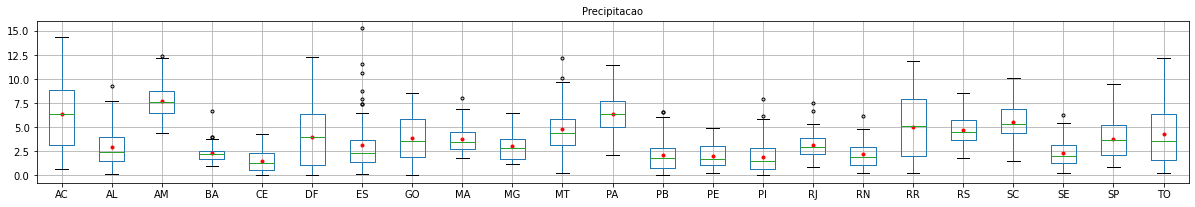

In [43]:
gera_boxplot_agrupado(df, 'Precipitacao', 'Estado', (20, 3), outliers = True)

In [44]:
# Trazendo apenas as informações de distribuição dos dados de temperatura máxima
desc_stats_Tmax = df[['Estado', 'TempMaxima']].groupby('Estado').describe()

# Trazendo o top 10 dos estados com as maiores médias
desc_stats_Tmax['TempMaxima'].sort_values(by = 'mean', ascending = False)[: 10]

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
PI,60.0,34.723839,1.351443,32.437073,33.767545,34.601855,35.685419,37.592126
RR,60.0,34.050176,1.175884,31.612903,33.070133,33.966089,34.972822,36.396825
RN,60.0,33.933546,0.809944,32.150568,33.388078,33.960752,34.565334,35.720455
CE,60.0,33.925726,0.977861,32.236224,33.185870,33.651362,34.548642,35.952419
MA,60.0,33.857142,0.676478,32.373518,33.462339,33.866501,34.316180,35.191393
TO,60.0,33.499637,1.384680,31.121935,32.403591,33.217303,34.625791,36.760909
MT,60.0,33.170477,1.000891,30.881522,32.405096,33.212298,33.781567,35.780870
AM,60.0,32.853401,0.611833,31.378899,32.447270,32.820903,33.267751,34.523729
PA,60.0,32.481507,0.456490,31.515249,32.194242,32.472058,32.823432,33.602767


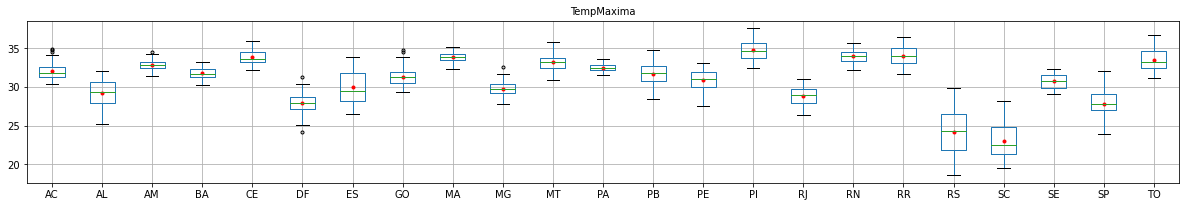

In [45]:
gera_boxplot_agrupado(df, 'TempMaxima', 'Estado', (20, 3), outliers = True)

In [46]:
# Trazendo apenas as informações de distribuição dos dados de temperatura mínima
desc_stats_Tmin = df[['Estado', 'TempMinima']].groupby('Estado').describe()

# Trazendo o top 10 dos estados com as maiores médias
desc_stats_Tmin['TempMinima'].sort_values(by = 'mean', ascending = False)[: 10]

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
RR,60.0,24.432352,0.379054,23.845238,24.206254,24.363731,24.594610,25.540678
AM,60.0,23.395282,0.451444,22.212025,23.181090,23.472426,23.688418,24.374766
MA,60.0,23.108898,0.344328,22.156612,22.888806,23.055500,23.361407,23.741456
PA,60.0,23.059923,0.252554,22.486495,22.874757,23.056085,23.248520,23.526183
RN,60.0,23.038961,0.418346,22.007874,22.744129,23.143961,23.349436,23.746988
SE,60.0,22.852518,0.697854,21.473770,22.180417,22.960833,23.513162,24.025806
AC,60.0,22.100566,1.245386,19.149462,21.331250,22.582258,22.940160,23.993103
CE,60.0,21.948209,0.572528,20.747573,21.580444,21.924673,22.341115,23.244355
PI,60.0,21.910475,0.902174,20.164773,21.335756,21.854984,22.471695,24.205485


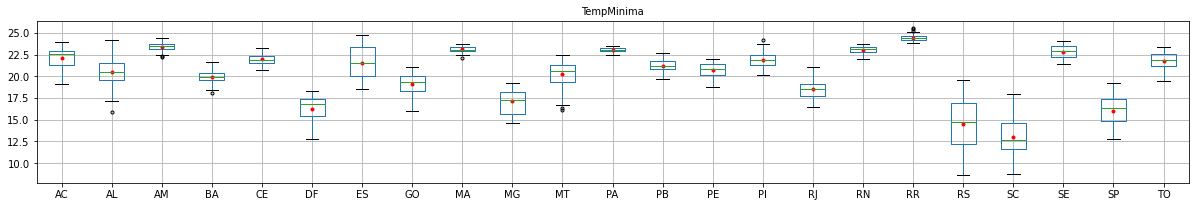

In [47]:
gera_boxplot_agrupado(df, 'TempMinima', 'Estado', (20, 3), outliers = True)

In [48]:
# Trazendo apenas as informações de distribuição dos dados de umidade
desc_stats_umid = df[['Estado', 'UmidadeRelativa']].groupby('Estado').describe()

# Trazendo o top 10 dos estados com as maiores médias
desc_stats_umid['UmidadeRelativa'].sort_values(by = 'mean', ascending = False)[: 10]

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
AM,60.0,85.410710,2.068566,79.937705,84.046598,85.446182,86.903633,89.720524
AC,60.0,84.996960,3.854648,73.118919,82.676854,85.732883,87.540630,90.577206
PA,60.0,80.731011,2.073040,75.281768,79.366884,80.793956,81.921640,85.515183
AL,60.0,79.856681,6.075241,69.444444,74.606536,79.349675,85.201273,90.125000
SC,60.0,77.966957,2.800082,71.338889,75.877931,78.084892,79.991667,82.940701
RS,60.0,76.601830,3.210664,69.389356,74.246995,76.871551,78.911088,82.686220
RR,60.0,76.168787,6.163878,60.493827,71.962036,78.146470,80.462450,87.458874
RJ,60.0,75.239333,2.670759,68.514286,73.496613,75.404131,76.960402,81.055300
ES,60.0,75.054782,3.293493,68.358974,72.482431,74.564516,77.647581,82.134409


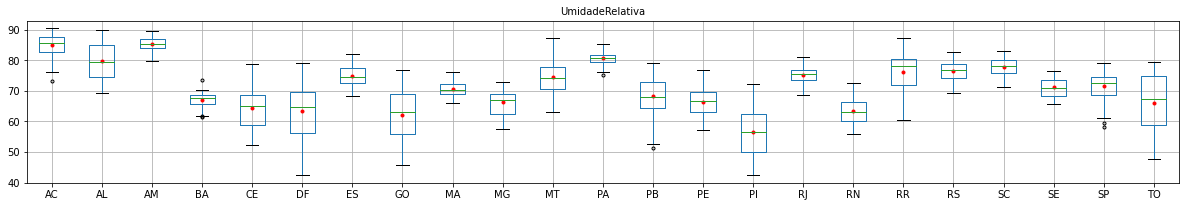

In [49]:
gera_boxplot_agrupado(df, 'UmidadeRelativa', 'Estado', (20, 3), outliers = True)

Com o resultado do describe e do boxplot para a precipitação, as temperaturas e a umidade, é possível reparar:
- Também houve uma queda na quantidade de outliers quando observadas por estado.
- Esses dados são realmente mais simétricos que a quantidade de queimadas, principalmente a umidade relativa que os valores de médias e medianas são na sua maioria muito próximos.

##### Por ano
Além da variação geográfica dos dados, temos uma variação de tempo e isso pode influenciar no comportamento do dataset como um todo. Pois sabemos que as características climáticas podem se alterar entre um ano e outro.

In [50]:
desc_ano_umid = df[['Ano', 'QtQueimadas']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['QtQueimadas'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2015,276.0,767.221014,1819.398190,0.0,25.00,90.5,369.25,11068.0
2012,276.0,619.463768,1565.734071,0.0,18.00,71.0,326.00,10395.0
2014,276.0,600.847826,1404.145203,0.0,19.75,72.5,334.75,8555.0
2016,276.0,590.123188,1213.919458,0.0,21.75,106.0,503.75,8981.0
2013,276.0,369.775362,836.973557,0.0,14.00,58.0,239.00,5576.0


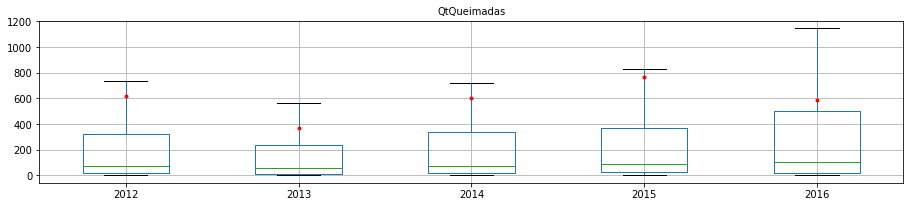

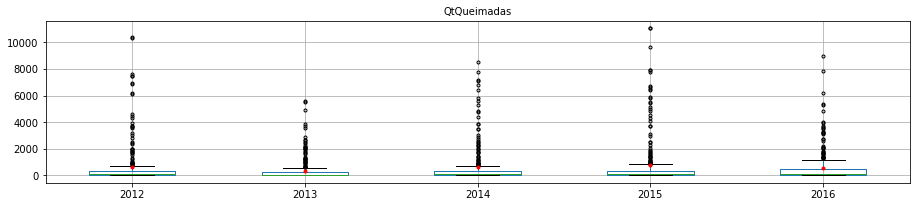

In [51]:
gera_boxplot_agrupado(df, 'QtQueimadas', 'Ano', (15, 3), outliers = False)
gera_boxplot_agrupado(df, 'QtQueimadas', 'Ano', (15, 3), outliers = True)

Com o resultado do describe e do boxplot para a quantidade de queimadas, é possível reparar:
- Como vimos anteriormente, os valores extremos se devem principalmente pela grande variação causada pela regionalidade. Muito provavelmente se olharmos a distribuição dos dados por estado e por ano essa quantidade de outliers será muito menor.
- A assimetria para a direita ainda continua presente. Ou seja, existem valores muito altos puxando a média pra cima, apesar da grande maioria dos valores serem mais baixos.
- Visivelmente conseguimos identificar que os anos de 2012 e 2015 obtiveram os maiores números de queimadas.

In [52]:
desc_ano_umid = df[['Ano', 'Precipitacao']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['Precipitacao'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2013,276.0,4.016801,2.821394,0.078607,1.997327,3.301612,5.537403,15.304839
2014,276.0,3.971967,2.479545,0.072348,2.108135,3.368682,5.881983,14.368605
2016,276.0,3.718498,2.657386,0.000000,1.532647,3.315425,5.450491,12.235862
2015,276.0,3.608603,2.584102,0.000000,1.465822,3.157694,5.258701,12.448171
2012,276.0,3.578280,2.608537,0.005333,1.699832,2.705662,4.706015,12.301205


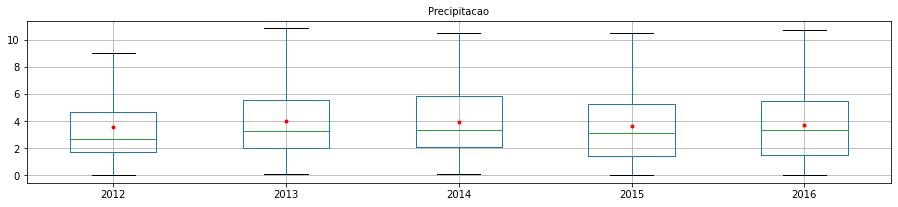

In [53]:
gera_boxplot_agrupado(df, 'Precipitacao', 'Ano', (15, 3), outliers = False)

In [54]:
desc_ano_umid = df[['Ano', 'TempMaxima']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['TempMaxima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2015,276.0,31.195925,3.358980,20.641129,29.775622,32.028646,33.408982,37.592126
2016,276.0,31.188059,3.385444,18.610606,29.530123,31.823354,33.625570,37.145679
2012,276.0,30.893112,3.209310,19.335904,29.270717,31.449321,33.048488,37.134914
2014,276.0,30.765366,3.143043,19.319274,29.330722,31.549260,32.942261,36.080682
2013,276.0,30.692420,3.387249,18.554637,29.106004,31.682584,32.908319,36.396825


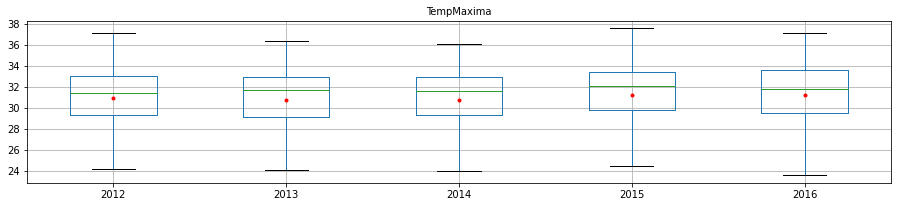

In [55]:
gera_boxplot_agrupado(df, 'TempMaxima', 'Ano', (15, 3), outliers = False)

In [56]:
desc_ano_umid = df[['Ano', 'TempMinima']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['TempMinima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2016,276.0,20.486568,3.296017,9.377879,18.913522,21.423506,22.962167,24.755172
2015,276.0,20.407922,3.148269,11.092500,18.266505,21.104767,23.032681,24.592308
2014,276.0,20.166467,3.198538,10.946927,18.431210,20.868883,22.709460,24.903846
2013,276.0,20.146259,3.407461,8.593250,18.241000,21.141589,22.720731,25.540678
2012,276.0,20.143561,3.148350,8.970361,18.442606,20.870553,22.630152,25.151852


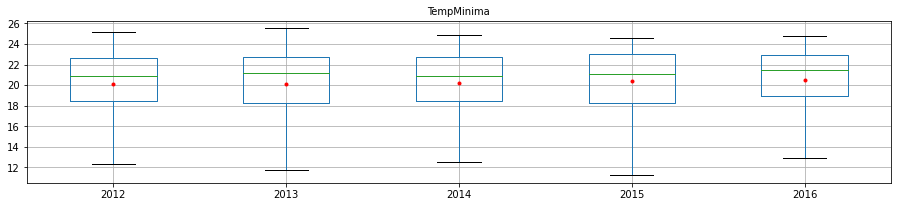

In [57]:
gera_boxplot_agrupado(df, 'TempMinima', 'Ano', (15, 3), outliers = False)

In [58]:
desc_ano_umid = df[['Ano', 'UmidadeRelativa']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['UmidadeRelativa'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2014,276.0,72.396250,8.533716,46.232449,67.237300,73.084522,78.752808,89.309013
2013,276.0,71.999538,8.740589,44.614907,66.871928,72.710501,78.811420,88.387097
2015,276.0,71.242420,9.258806,42.503226,66.495968,71.687229,77.482971,90.577206
2012,276.0,71.223647,9.621374,42.322581,65.228813,71.732456,78.375362,89.720524
2016,276.0,70.496449,9.166641,45.029508,65.245804,70.476398,77.277526,90.048276


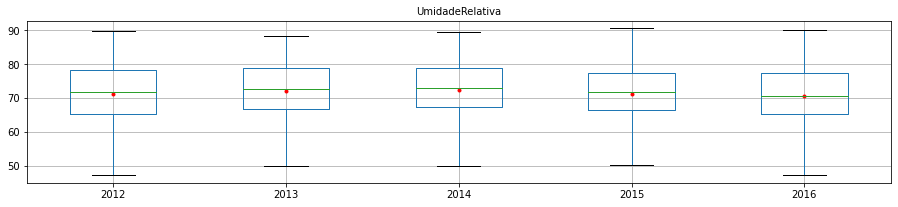

In [59]:
gera_boxplot_agrupado(df, 'UmidadeRelativa', 'Ano', (15, 3), outliers = False)

Com o resultado do describe e do boxplot para a precipitação, as temperaturas e a umidade, é possível reparar:
- Esses dados são realmente mais simétricos que a quantidade de queimadas, principalmente a umidade relativa que os valores de médias e medianas são na sua maioria muito próximos.
- Quando observadas como um todo apenas separando por ano, não é possível identificar uma grande variação como quando os dados foram agrupados po estados.

#### Análise de Variância
Como observamos na análise descritiva, o agrupamento por estados pareceu interferir bastante nas variáveis. Para definir se realmente existe uma diferença significativa entre os estados, fizemos uma análise de variância (ANOVA)

In [60]:
modelo = ols('QtQueimadas ~ Estado', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [61]:
anova_table

,sum_sq,df,F,PR(>F)
Estado,7.613714e+08,22.0,23.652726,3.878474e-80
Residual,1.985512e+09,1357.0,NaN,NaN


Com o resultado da ANOVA, é possível dizer que a variável estado tem um efeito significativo na variável de quantidade de queimadas, pois o valor de F é alto e o valor de p (PR(>F)) é menor que 0,05.

#### Séries Temporais

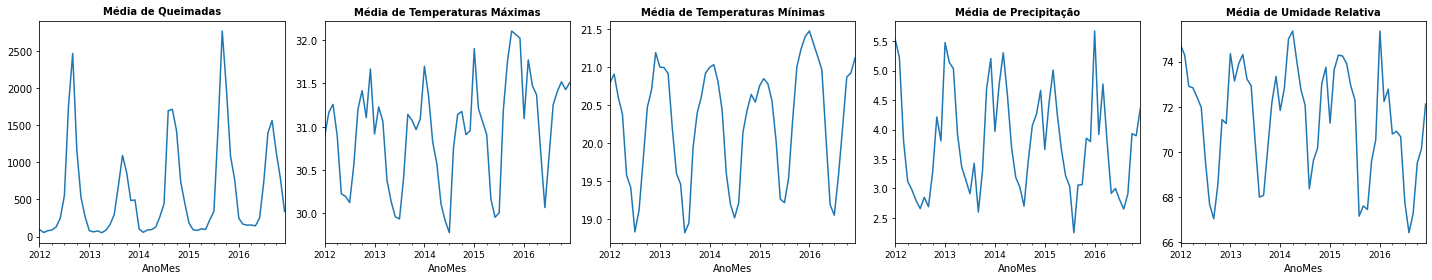

In [62]:
#Plotandos os gráficos das Séries temporais

fig = plt.figure(figsize=(20,4))
plt.gcf().set_facecolor('white')

#Queimadas
plt.subplot(1, 5, 1)
plt.title('Média de Queimadas', fontsize=10, weight='bold')
plt.tick_params(axis='x', labelsize=9)
df.groupby(['AnoMes'])['QtQueimadas'].mean().plot()
#Temperatura Máxima
plt.subplot(1, 5, 2)
plt.title('Média de Temperaturas Máximas', fontsize=10, weight='bold')
plt.tick_params(axis='x', labelsize=9)
df.groupby(['AnoMes'])['TempMaxima'].mean().plot()
#Temperatura Mínima
plt.subplot(1, 5, 3)
plt.title('Média de Temperaturas Mínimas', fontsize=10, weight='bold')
plt.tick_params(axis='x', labelsize=9)
df.groupby(['AnoMes'])['TempMinima'].mean().plot()
#Precipitação
plt.subplot(1, 5, 4)
plt.title('Média de Precipitação', fontsize=10, weight='bold')
plt.tick_params(axis='x', labelsize=9)
df.groupby(['AnoMes'])['Precipitacao'].mean().plot()
#Umidade Relativa
plt.subplot(1, 5, 5)
plt.title('Média de Umidade Relativa', fontsize=10, weight='bold')
plt.tick_params(axis='x', labelsize=9)
df.groupby(['AnoMes'])['UmidadeRelativa'].mean().plot()

plt.tight_layout()
plt.show()

Observando os gráficos abaixo, podemos ver que existe uma sazonalidade na ocorrência de queimadas no Brasil, ocorrendo um pico entre junho e novembro. As outras variáveis (precipitação, temperaturas e umidades) também apresentam uma sazonalidade. Será que as sazonalidades das variáveis estão relacionadas com a ocorrência de queimadas?

##### Criação de funções para plotar os gráficos:

In [63]:
def gerar_correlacoes(dfcorr, style):
  correlacoes = dfcorr[['TempMaxima', 'TempMinima', 'UmidadeRelativa', 'Precipitacao', 'QtQueimadas']].corr()
  return correlacoes.style.background_gradient(cmap= style)

In [64]:
#Criando uma função para plotar os gráficos
def gerar_graficos(df2013, df2015):
#Criandos os Dataframes para plotar os gráficos
  #Queimadas
  comp_queimadas = pd.DataFrame()
  comp_queimadas['2013'] = (df2013.groupby(['AnoMes'])['QtQueimadas'].mean().reset_index())[['QtQueimadas']]
  comp_queimadas['2015'] = (df2015.groupby(['AnoMes'])['QtQueimadas'].mean().reset_index())[['QtQueimadas']]

  #UmidadeRelativa
  comp_umidadeR = pd.DataFrame()
  comp_umidadeR['2013'] = (df2013.groupby(['AnoMes'])['UmidadeRelativa'].mean().reset_index())[['UmidadeRelativa']]
  comp_umidadeR['2015'] = (df2015.groupby(['AnoMes'])['UmidadeRelativa'].mean().reset_index())[['UmidadeRelativa']]

  #Precipitação
  comp_preciptacao = pd.DataFrame()
  comp_preciptacao['2013'] = (df2013.groupby(['AnoMes'])['Precipitacao'].mean().reset_index())[['Precipitacao']]
  comp_preciptacao['2015'] = (df2015.groupby(['AnoMes'])['Precipitacao'].mean().reset_index())[['Precipitacao']]

  #TempMax
  comp_tempmax = pd.DataFrame()
  comp_tempmax['2013'] = (df2013.groupby(['AnoMes'])['TempMaxima'].mean().reset_index())[['TempMaxima']]
  comp_tempmax['2015'] = (df2015.groupby(['AnoMes'])['TempMaxima'].mean().reset_index())[['TempMaxima']]

  #TempMin
  comp_tempmin = pd.DataFrame()
  comp_tempmin['2013'] = (df2013.groupby(['AnoMes'])['TempMinima'].mean().reset_index())[['TempMinima']]
  comp_tempmin['2015'] = (df2015.groupby(['AnoMes'])['TempMinima'].mean().reset_index())[['TempMinima']]


  #Defindo variáveis para inserir no plot de gráficos

  uf = df2013.iat[0, 4]
  x = list(range(1, 13))

  q1 = comp_queimadas['2013']
  q2 = comp_queimadas['2015']

  u1 = comp_umidadeR['2013']
  u2 = comp_umidadeR['2015']

  p1 = comp_preciptacao['2013']
  p2 = comp_preciptacao['2015']

  tx1 = comp_tempmax['2013']
  tx2 = comp_tempmax['2015']

  tm1 = comp_tempmin['2013']
  tm2 = comp_tempmin['2015']


  fig = plt.figure(figsize=(20,10))
  plt.gcf().set_facecolor('white')

  #Plot de queimadas
  plt.subplot(2, 3, 1)
  plt.title(f'Média de queimadas de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, q1 , marker='o', label='2013')
  plt.plot(x, q2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de Umidade Relativa
  plt.subplot(2, 3, 2)
  plt.title(f'Média de umidade de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, u1 , marker='o', label='2013')
  plt.plot(x, u2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de Precipitacao
  plt.subplot(2, 3, 3)
  plt.title(f'Média de Precipitação de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, p1 , marker='o', label='2013')
  plt.plot(x, p2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de TempMaxima
  plt.subplot(2, 3, 4)
  plt.title(f'Média de Temperatura Maxima de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, tx1 , marker='o', label='2013')
  plt.plot(x, tx2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de TempMaxima
  plt.subplot(2, 3, 5)
  plt.title(f'Média de Temperatura Minima de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, tm1 , marker='o', label='2013')
  plt.plot(x, tm2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()

  plt.tight_layout()
  plt.show()


#### Correlacao

##### Correlação Geral
Olhando os dados como um todo, reparamos que não teve nenhuma correlação muito forte da quantidade de queimadas com as outras variáveis.

In [65]:
gerar_correlacoes(df, 'Blues')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.851507,-0.328669,-0.165314,0.267383
TempMinima,0.851507,1.000000,0.042959,0.069593,0.121732
UmidadeRelativa,-0.328669,0.042959,1.000000,0.666902,-0.101210
Precipitacao,-0.165314,0.069593,0.666902,1.000000,-0.031963
QtQueimadas,0.267383,0.121732,-0.101210,-0.031963,1.000000


##### Correlacao filtrando estados e anos específicos

Como observado nas análises anteriores, os estados tem um efeito significativo na variável de quantidade de incêndios. <br>
Para tentar observar com mais detalhes os efeitos de cada uma das características do clima, resolvemos observar com detalhes alguns estados. Foram selecionados um estado de cada região do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul) e os anos com a maior e menor média de quantidade de incêndios (2013 e 2015)

##### Pará (Norte)

In [66]:
df_pa_2013 = df[(df['Estado'] == 'PA') & (df['Ano'] == 2013)]
df_pa_2015 = df[(df['Estado'] == 'PA') & (df['Ano'] == 2015)]

In [67]:
gerar_correlacoes(df_pa_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.107753,-0.735734,-0.811710,-0.169331
TempMinima,-0.107753,1.000000,-0.102172,0.103985,0.079012
UmidadeRelativa,-0.735734,-0.102172,1.000000,0.782667,-0.317950
Precipitacao,-0.811710,0.103985,0.782667,1.000000,0.144356
QtQueimadas,-0.169331,0.079012,-0.317950,0.144356,1.000000


In [68]:
gerar_correlacoes(df_pa_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.585680,-0.886874,-0.955665,0.526048
TempMinima,0.585680,1.000000,-0.272770,-0.399275,0.080125
UmidadeRelativa,-0.886874,-0.272770,1.000000,0.859981,-0.786935
Precipitacao,-0.955665,-0.399275,0.859981,1.000000,-0.431701
QtQueimadas,0.526048,0.080125,-0.786935,-0.431701,1.000000


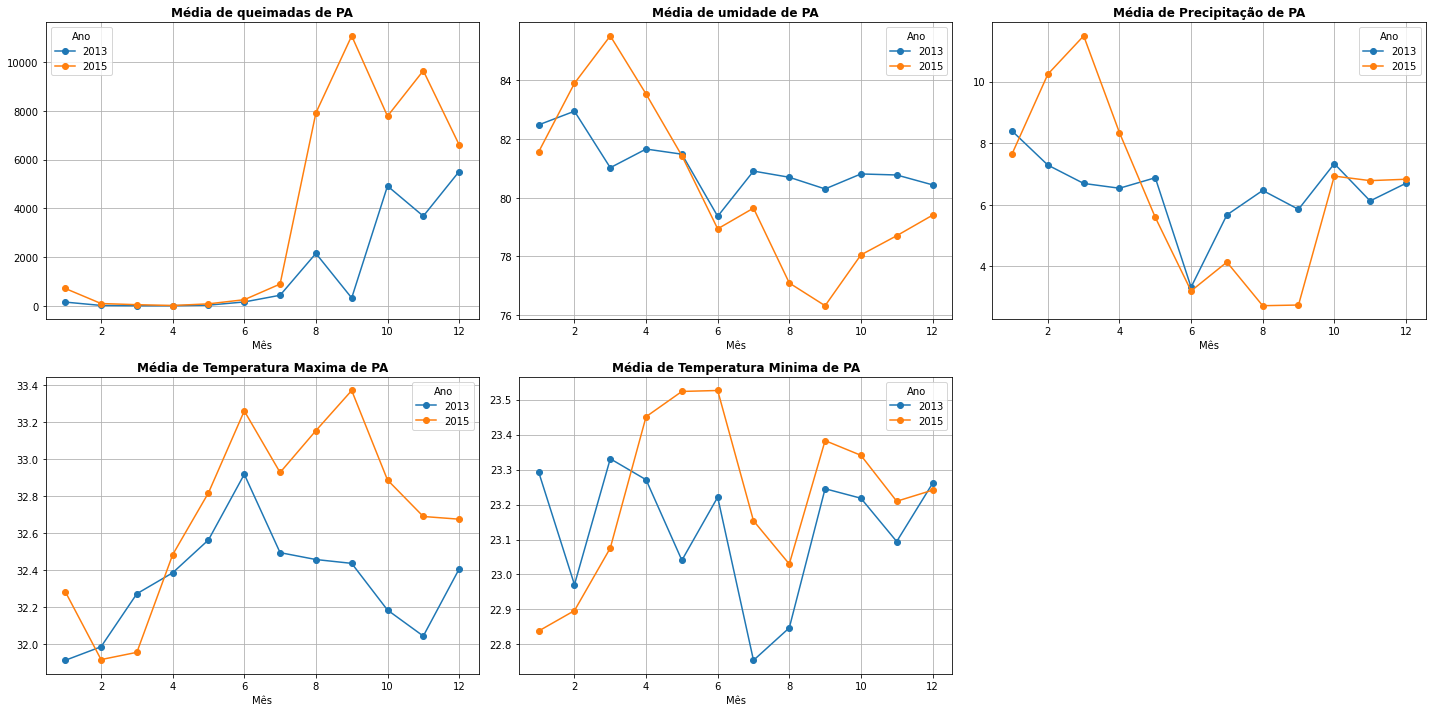

In [69]:
gerar_graficos(df_pa_2013, df_pa_2015)

conclusao_geral

##### Pernambuco (Nordeste)

In [70]:
df_pe_2013 = df[(df['Estado'] == 'PE') & (df['Ano'] == 2013)]
df_pe_2015 = df[(df['Estado'] == 'PE') & (df['Ano'] == 2015)]

In [71]:
gerar_correlacoes(df_pe_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.881967,-0.847471,-0.675301,0.621235
TempMinima,0.881967,1.000000,-0.546774,-0.320961,0.317074
UmidadeRelativa,-0.847471,-0.546774,1.000000,0.844540,-0.641432
Precipitacao,-0.675301,-0.320961,0.844540,1.000000,-0.636460
QtQueimadas,0.621235,0.317074,-0.641432,-0.636460,1.000000


In [72]:
gerar_correlacoes(df_pe_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.676221,-0.785420,-0.777848,0.878027
TempMinima,0.676221,1.000000,-0.249051,-0.189058,0.592097
UmidadeRelativa,-0.785420,-0.249051,1.000000,0.851130,-0.795487
Precipitacao,-0.777848,-0.189058,0.851130,1.000000,-0.638858
QtQueimadas,0.878027,0.592097,-0.795487,-0.638858,1.000000


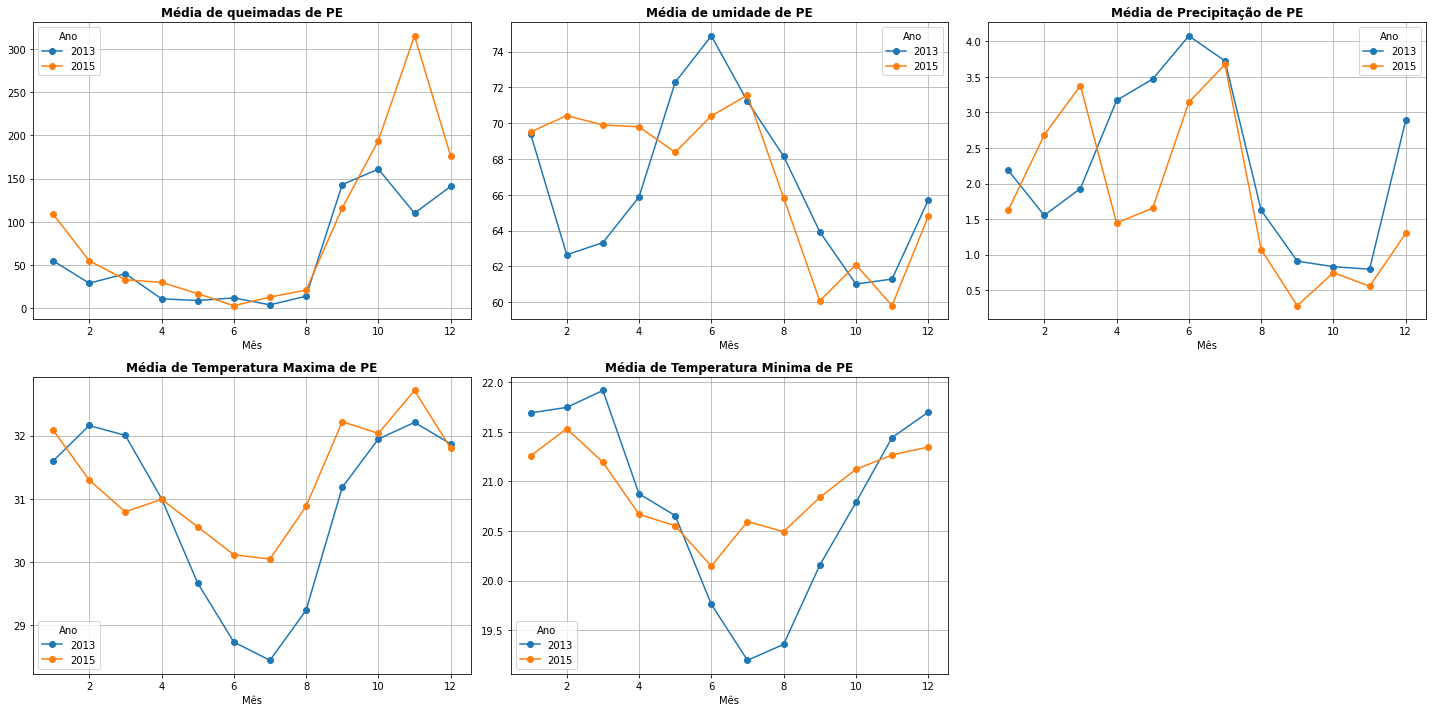

In [73]:
gerar_graficos(df_pe_2013, df_pe_2015)

conclusao_geral

##### Mato Grosso (Centro-Oeste)

In [74]:
df_mt_2013 = df[(df['Estado'] == 'MT') & (df['Ano'] == 2013)]
df_mt_2015 = df[(df['Estado'] == 'MT') & (df['Ano'] == 2015)]

In [75]:
gerar_correlacoes(df_mt_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.486630,-0.761762,-0.790732,0.705535
TempMinima,-0.486630,1.000000,0.895989,0.705992,-0.389447
UmidadeRelativa,-0.761762,0.895989,1.000000,0.872731,-0.618551
Precipitacao,-0.790732,0.705992,0.872731,1.000000,-0.356197
QtQueimadas,0.705535,-0.389447,-0.618551,-0.356197,1.000000


In [76]:
gerar_correlacoes(df_mt_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.016020,-0.523747,0.021525,0.800884
TempMinima,-0.016020,1.000000,0.283305,0.508018,0.050247
UmidadeRelativa,-0.523747,0.283305,1.000000,0.351459,-0.595231
Precipitacao,0.021525,0.508018,0.351459,1.000000,-0.148476
QtQueimadas,0.800884,0.050247,-0.595231,-0.148476,1.000000


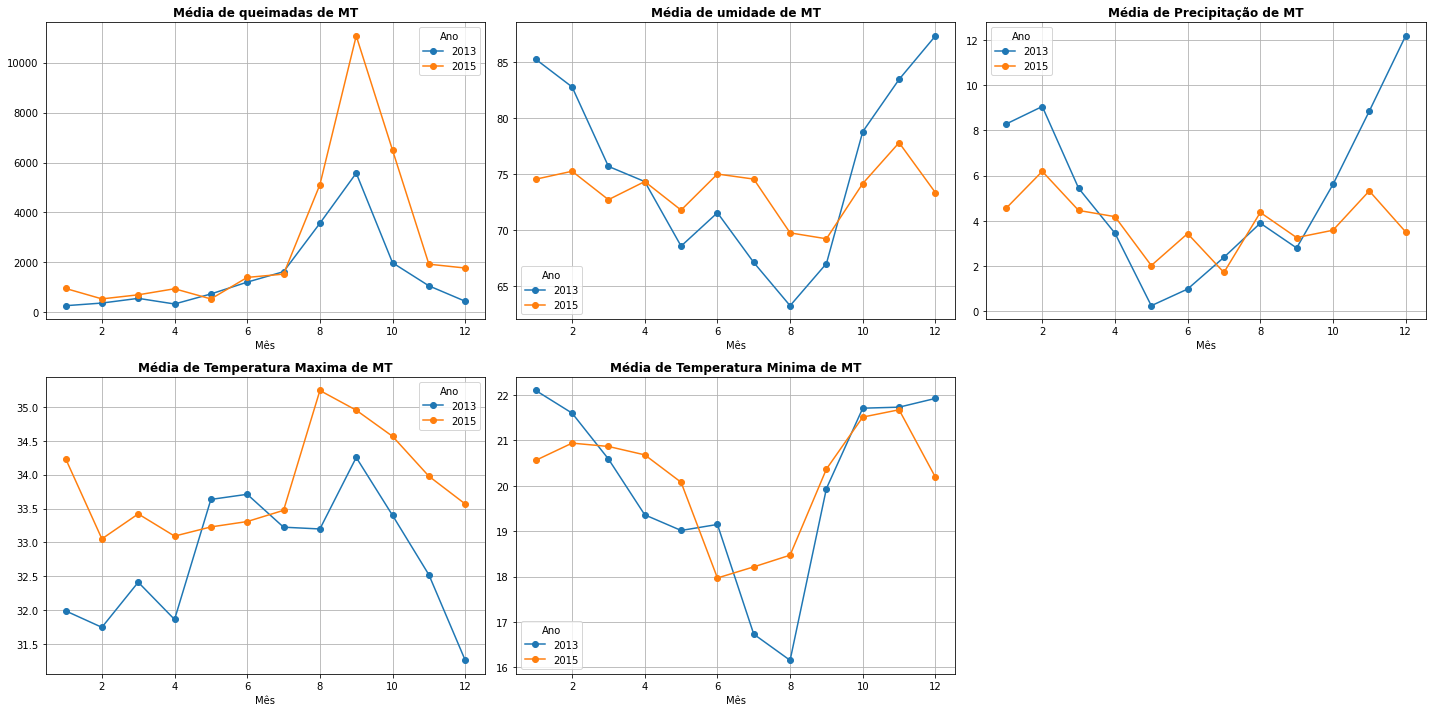

In [77]:
gerar_graficos(df_mt_2013, df_mt_2015)

conclusao_geral

##### São Paulo (Sudeste)

In [78]:
df_sp_2013 = df[(df['Estado'] == 'SP') & (df['Ano'] == 2013)]
df_sp_2015 = df[(df['Estado'] == 'SP') & (df['Ano'] == 2015)]

In [79]:
gerar_correlacoes(df_sp_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.812653,0.024812,0.638047,-0.040238
TempMinima,0.812653,1.000000,0.561522,0.846403,-0.509225
UmidadeRelativa,0.024812,0.561522,1.000000,0.538009,-0.913105
Precipitacao,0.638047,0.846403,0.538009,1.000000,-0.452998
QtQueimadas,-0.040238,-0.509225,-0.913105,-0.452998,1.000000


In [80]:
gerar_correlacoes(df_sp_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.762855,-0.466183,0.247367,0.264728
TempMinima,0.762855,1.000000,0.083834,0.704229,-0.217994
UmidadeRelativa,-0.466183,0.083834,1.000000,0.485310,-0.905041
Precipitacao,0.247367,0.704229,0.485310,1.000000,-0.351710
QtQueimadas,0.264728,-0.217994,-0.905041,-0.351710,1.000000


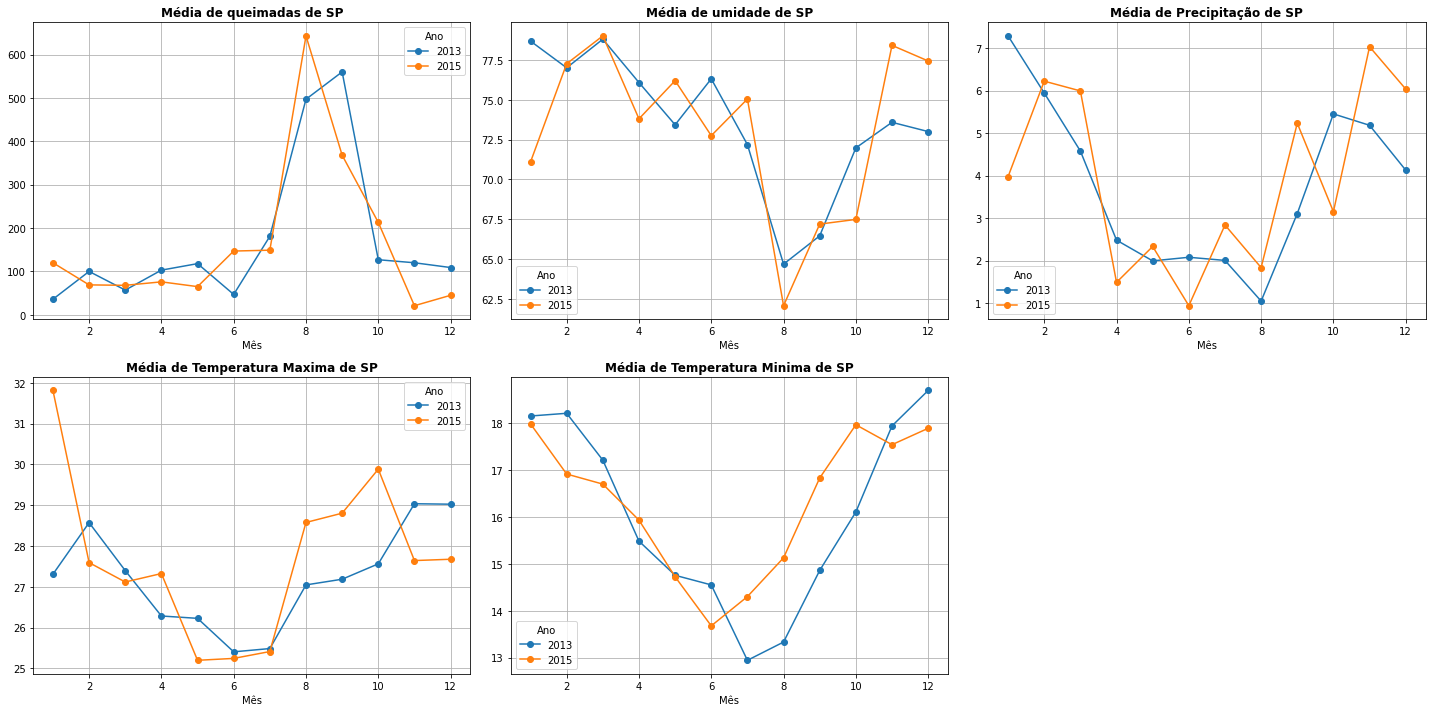

In [81]:
gerar_graficos(df_sp_2013, df_sp_2015)

conclusao_geral

##### Santa Catarina (Sul)

In [82]:
df_sc_2013 = df[(df['Estado'] == 'SC') & (df['Ano'] == 2013)]
df_sc_2015 = df[(df['Estado'] == 'SC') & (df['Ano'] == 2015)]

In [83]:
gerar_correlacoes(df_sc_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.923301,-0.729416,-0.233342,-0.583539
TempMinima,0.923301,1.000000,-0.444622,-0.228139,-0.729679
UmidadeRelativa,-0.729416,-0.444622,1.000000,0.288329,0.236896
Precipitacao,-0.233342,-0.228139,0.288329,1.000000,0.347588
QtQueimadas,-0.583539,-0.729679,0.236896,0.347588,1.000000


In [84]:
gerar_correlacoes(df_sc_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.966920,-0.650665,-0.065963,-0.344138
TempMinima,0.966920,1.000000,-0.519625,0.085387,-0.473527
UmidadeRelativa,-0.650665,-0.519625,1.000000,0.369548,-0.277208
Precipitacao,-0.065963,0.085387,0.369548,1.000000,-0.433888
QtQueimadas,-0.344138,-0.473527,-0.277208,-0.433888,1.000000


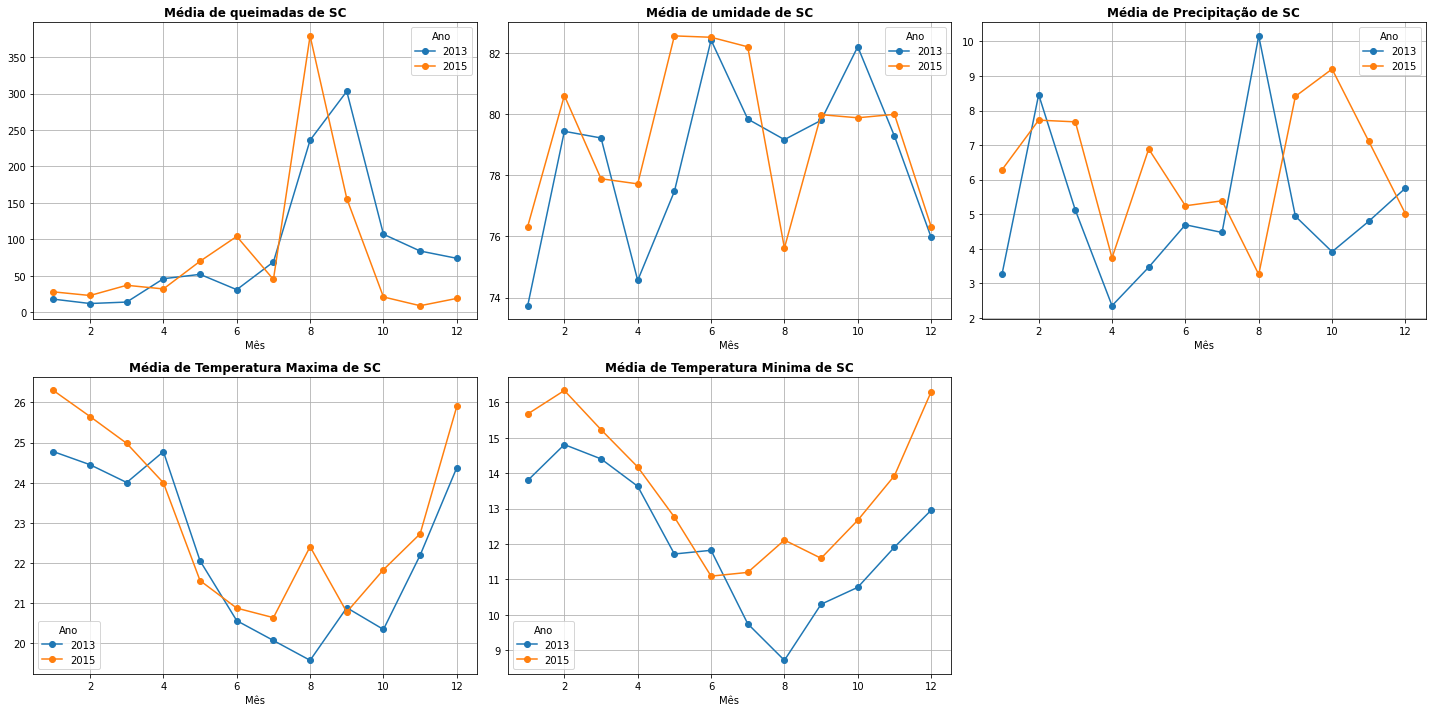

In [85]:
gerar_graficos(df_sc_2013, df_sc_2015)

conclusao_geral

#### Considerações finais e agradecimentos

É importante ressaltar que a correlação indica uma relação estatística entre duas variáveis, mas não prova que uma causa a outra. Para afirmar causalidade, são necessárias evidências adicionais além da correlação.